# Multilayer Perceptron Model to Classify Mnist Dataset

In [0]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np

## Data Preparation

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print('Train data dimension: {}'.format(x_train.shape))
print('Test data dimension: {}'.format(x_test.shape))
print('Test label dimension: {}'.format(y_test.shape))

print('Max Training data: {}'.format(np.max(x_train)))
print('Min Training data: {}'.format(np.min(x_train)))

print('Max Test data: {}'.format(np.max(x_test)))
print('Min Test data: {}'.format(np.min(x_test)))

Train data dimension: (60000, 28, 28)
Test data dimension: (10000, 28, 28)
Test label dimension: (10000,)
Max Training data: 255
Min Training data: 0
Max Test data: 255
Min Test data: 0


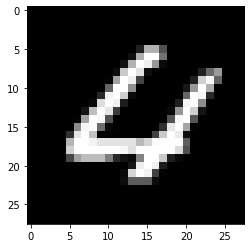

label: 4


In [6]:
rand_num = np.random.randint(60000)
# plot using plt.imshow() & plt.show()
plt.imshow(x_train[rand_num],cmap='gray')
plt.show()
# print its label
print('label:', y_train[rand_num])

In [0]:
#reshaping data to flatten image
x_train = np.reshape(x_train,[-1, 28*28])
x_test = np.reshape(x_test,[-1, 28*28])

In [0]:
# normalize pixel values
x_train = x_train.astype('float32') / np.max(x_train)
x_test = x_test.astype('float32') / np.max(x_train)

In [0]:
# one hot encode labels
y_train_one_hot = np_utils.to_categorical(y_train, 10)
y_test_one_hot = np_utils.to_categorical(y_test, 10)

## Define Model

The model is comprised of two hidden layers using the relu activation function
and one output layer using the softmax activation function

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,),kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(512, activation='relu', kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(10, activation='softmax', kernel_initializer= RandomNormal(0,0.01)))

Determine loss function, optimizer, and metrics

In [11]:
sgd = SGD(lr=0.01,)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

Model Summary

In [12]:
model.summary()

#saving model to be used later
model.save('raw_model.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________








Training and Evaluating the Model

In [16]:
mlp_model = model.fit(x_train, y_train_one_hot,
                      batch_size = 32,
                      epochs = 3,
                      verbose = 1,
                      validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 8s 159us/step - loss: 0.3471 - acc: 0.9011 - val_loss: 0.3073 - val_acc: 0.9123
Epoch 2/3
48000/48000 [==============================] - 8s 158us/step - loss: 0.3136 - acc: 0.9104 - val_loss: 0.2791 - val_acc: 0.9206
Epoch 3/3
48000/48000 [==============================] - 8s 166us/step - loss: 0.2829 - acc: 0.9195 - val_loss: 0.2513 - val_acc: 0.9291
